# Project 3: Cleaning and EDA
----

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer 

In [2]:
"""Unsure how much data I wanted to work with, thre are multiple csv's
however, just_text is our final product. If you want to see how just__text was made uncomment
large variable"""
#df = pd.read_csv('./data/submissions_12k.csv')
large = pd.read_csv('./data/submissions_50k.csv')
just_text = pd.read_csv('./data/text_base.csv')

In [4]:
large.head()

,created_utc,id,score,selftext,subreddit,title
0,1596178704,i12z41,1,NaN,explainlikeimfive,ELI5: What is Twitter?
1,1596178411,i12x6f,1,I’ve always been fascinated by the concept of ...,explainlikeimfive,ELI5: Why Does the Bail System Exist as it is?
2,1596178193,i12vt1,1,NaN,explainlikeimfive,"ELI5, if countless animals have existed before..."
3,1596178089,i12v4g,1,NaN,explainlikeimfive,ELI5: What is Radiation Stress and how does it...
4,1596178011,i12un7,1,How can I possibly buy stuff online for insane...,explainlikeimfive,Eli5: How can stuff be so cheap online?


In [5]:
large.isna().sum()

created_utc        0
id                 0
score              0
selftext       28829
subreddit          0
title              0
dtype: int64

In [6]:
(large.loc[(large['selftext'].isna()) & (large['subreddit'] =='explainlikeimfive')]).shape

(14527, 6)

In [7]:
(large.loc[(large['selftext'].isna()) & (large['subreddit'] =='NoStupidQuestions')]).shape

(14302, 6)

A pretty even amound of NaNs in the two data frames.

In [8]:
large['title'].unique().shape

(95141,)

In [9]:
large['id'].unique().shape

(96173,)

There are some duplicate posts that were either reposted by the user or pulled twice by our function, we will drop those as they are redundant information

In [10]:
large[large['id'].isin(large['id'][large['id'].duplicated()])].sort_values(by='id')

,created_utc,id,score,selftext,subreddit,title
8199,1603083141,jdvf9t,1,NaN,explainlikeimfive,ELI5: What is involved in a coat hanger abortion?
8022,1603083141,jdvf9t,1,NaN,explainlikeimfive,ELI5: What is involved in a coat hanger abortion?
8021,1603083468,jdvhr6,1,NaN,explainlikeimfive,ELI5: Why are some ships’ decks numbered/named...
8198,1603083468,jdvhr6,1,NaN,explainlikeimfive,ELI5: Why are some ships’ decks numbered/named...
8020,1603083805,jdvkf5,1,What about a wheel drives the hamster to want ...,explainlikeimfive,ELI5: Why do pets such as hamsters run on hams...
...,...,...,...,...,...,...
75601,1618003636,mnr3l5,1,I’m in the middle of Nietzsche’s Gay Science r...,NoStupidQuestions,Why don’t famous philosophers have glossaries ...
75600,1618003731,mnr4p3,1,NaN,NoStupidQuestions,"If the sea is rising, can't we dig a channel f..."
75400,1618003731,mnr4p3,1,NaN,NoStupidQuestions,"If the sea is rising, can't we dig a channel f..."
75300,1618003731,mnr4p3,1,NaN,NoStupidQuestions,"If the sea is rising, can't we dig a channel f..."


In [11]:
large2 = large.drop_duplicates(subset='id',keep='first',ignore_index=True)

In [12]:
large2.shape

(96173, 6)

In [13]:
large2 = large2.drop_duplicates(subset='title',keep='first',ignore_index=True)

In [14]:
large2.shape

(95141, 6)

In [15]:
(large2.loc[(large['selftext'].isna()) & (large2['subreddit'] =='explainlikeimfive')]).shape

(13831, 6)

In [16]:
(large2.loc[(large['selftext'].isna()) & (large2['subreddit'] =='NoStupidQuestions')]).shape

(13621, 6)

In [17]:
large2.fillna('IGNORETHISTEXT',inplace=True)

Filling in NA values with text that can be either added to stopwords later, or, more likely, I will combine 'selftext' and 'title' into a single column and remove this filler text.

In [18]:
large2.isna().sum()

created_utc    0
id             0
score          0
selftext       0
subreddit      0
title          0
dtype: int64

In [19]:
#large2.to_csv('./data/cleaned.csv',index=False)

In [20]:
large2['title_length'] = large2['title'].apply(lambda x:len(x))

large2['title_word_count']=large2['title'].str.split().apply(lambda x:len(x))

In [21]:
print(f"NoStupidQuestions Average Charcount: {large2.loc[large2['subreddit']=='NoStupidQuestions','title_length'].mean()}, Explainlikeimfive Average Charcount:{large2.loc[large2['subreddit']=='explainlikeimfive','title_length'].mean()}"
)
print(f"NoStupidQuestions Average Wordcount: {large2.loc[large2['subreddit']=='NoStupidQuestions','title_word_count'].mean()}, Explainlikeimfive Average Wordcount:{large2.loc[large2['subreddit']=='explainlikeimfive','title_word_count'].mean()}"
)


NoStupidQuestions Average Charcount: 73.89528116233303, Explainlikeimfive Average Charcount:80.74281794195251
NoStupidQuestions Average Wordcount: 13.718063057404848, Explainlikeimfive Average Wordcount:14.561266490765172


Creating two new columns for word_count and char count to get get a baseline idea of the two subreddits.

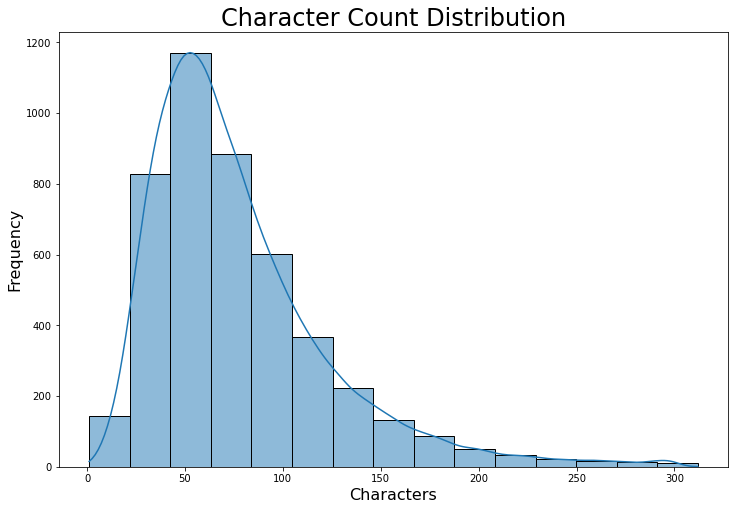

In [22]:
plt.figure(figsize=(12,8))
sns.histplot(large2['title_length'],bins=15,kde=True,stat='frequency');
plt.title('Character Count Distribution',size=24);
plt.xlabel('Characters',fontsize=16)
plt.ylabel('Frequency',fontsize=16);

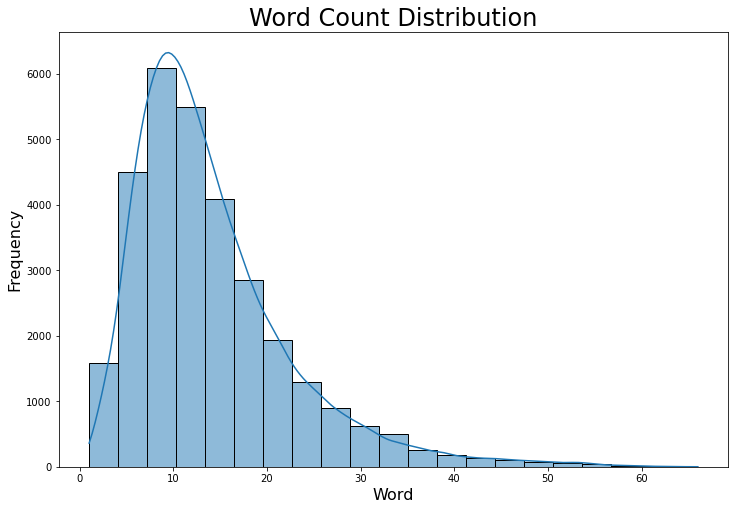

In [23]:
plt.figure(figsize=(12,8))
sns.histplot(large2['title_word_count'],bins=21,kde=True,stat='frequency');
plt.title('Word Count Distribution',size=24);
plt.xlabel('Word',fontsize=16)
plt.ylabel('Frequency',fontsize=16);

Checking out the distribution of titles they combined data appears to be positively skewed. This will not be the final form of the distribution.

In [24]:
large2.columns

Index(['created_utc', 'id', 'score', 'selftext', 'subreddit', 'title',
       'title_length', 'title_word_count'],
      dtype='object')

In [25]:
large2['text']=large2['title'] + " " + large2['selftext']

In [27]:
just_text = large2[['text','subreddit']].copy()

In [28]:
just_text.head()

,text,subreddit
0,ELI5: What is Twitter? IGNORETHISTEXT,explainlikeimfive
1,ELI5: Why Does the Bail System Exist as it is?...,explainlikeimfive
2,"ELI5, if countless animals have existed before...",explainlikeimfive
3,ELI5: What is Radiation Stress and how does it...,explainlikeimfive
4,Eli5: How can stuff be so cheap online? How ca...,explainlikeimfive


New data frame with just subreddit and all other text.

In [29]:
#large2.to_csv('./data/cleaned.csv',index=False)

In [30]:
just_text['text'] = just_text['text'].str.replace('ELI5:', '',case=False)
just_text['text'] = just_text['text'].str.replace('ELI5,', '',case=False)
just_text['text'] = just_text['text'].str.replace('ELI5', '',case=False)
just_text['text'] = just_text['text'].str.replace('IGNORETHISTEXT', '',case=False)

Dropping place holder text and key indicator of subreddit.

In [32]:
just_text.head()

,text,subreddit
0,What is Twitter?,explainlikeimfive
1,Why Does the Bail System Exist as it is? I’ve...,explainlikeimfive
2,if countless animals have existed before huma...,explainlikeimfive
3,What is Radiation Stress and how does it rela...,explainlikeimfive
4,How can stuff be so cheap online? How can I p...,explainlikeimfive


In [33]:
just_text['length'] = just_text['text'].apply(lambda x:len(x))

just_text['word_count']=just_text['text'].str.split().apply(lambda x:len(x))

New columns for character count and word count.

In [34]:
just_text.loc[just_text['length']>10000]

,text,subreddit,length,word_count
79686,How would protect someone you care about? I kn...,NoStupidQuestions,13275,2659


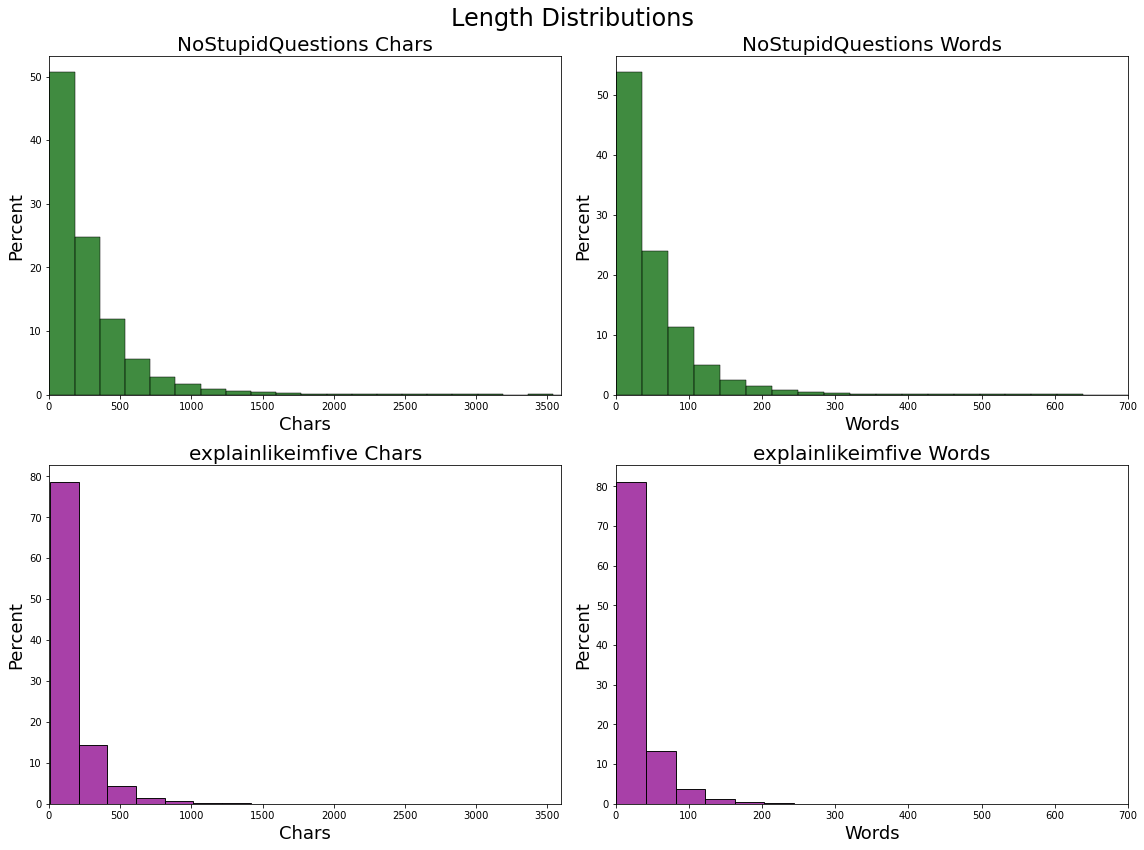

In [35]:
fig, ax = plt.subplots(2,2,figsize=(16,12))

#nostupidquestions

sns.histplot(just_text[just_text['subreddit']=='NoStupidQuestions']['length'],stat='percent',bins=75,ax=ax[0,0],color='darkgreen');
sns.histplot(just_text[just_text['subreddit']=='NoStupidQuestions']['word_count'],stat='percent',bins=75,ax=ax[0,1],color='darkgreen');

#explainlikeimfive

sns.histplot(just_text[just_text['subreddit']=='explainlikeimfive']['length'],stat='percent',bins=40,ax=ax[1,0],color='darkmagenta');
sns.histplot(just_text[just_text['subreddit']=='explainlikeimfive']['word_count'],stat='percent',bins=40,ax=ax[1,1],color='darkmagenta');


plt.suptitle('Length Distributions',size=24);


ax[0,0].set_xlabel('Chars',fontsize=18)
ax[0,0].set_ylabel('Percent',fontsize=18)

ax[0,1].set_xlabel('Words',fontsize=18)
ax[0,1].set_ylabel('Percent',fontsize=18)

ax[1,0].set_xlabel('Chars',fontsize=18)
ax[1,0].set_ylabel('Percent',fontsize=18)

ax[1,1].set_xlabel('Words',fontsize=18)
ax[1,1].set_ylabel('Percent',fontsize=18)

ax[0,0].set_xlim(0,3600)
ax[0,1].set_xlim(0,700)
ax[1,0].set_xlim(0,3600)
ax[1,1].set_xlim(0,700)


ax[0,0].set_title('NoStupidQuestions Chars',fontsize=20)
ax[0,1].set_title('NoStupidQuestions Words',fontsize=20)
ax[1,0].set_title('explainlikeimfive Chars',fontsize=20)
ax[1,1].set_title('explainlikeimfive Words',fontsize=20);
plt.tight_layout()

#plt.savefig('./imgs/post_length_distribution.png');

In this model we can see that contrary to what we saw at the start, NoStupdidQuestions is clearly the longer-form of the two subreddits. Longer posts to me indicate either more complex questions, or more personal narritive based questions. This helps us understand potential bias in the subreddits.

In [36]:
just_text[just_text['word_count']>500]['subreddit'].value_counts(normalize=False)

NoStupidQuestions    71
explainlikeimfive     3
Name: subreddit, dtype: int64

Way more posts over 500 words in NoStupidQuestions.

In [49]:
df_explain=just_text[just_text['subreddit']=='explainlikeimfive']
df_stupid=just_text[just_text['subreddit']=='NoStupidQuestions']

In [50]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords.append('eli5')
stopwords.append('ignorethistext')
stopwords.append('removed')
stopwords.append('like'),
stopwords.append('would'),
stopwords.append('know'),
stopwords.append('go'),
stopwords.append('get')
stopwords.append('us')
stopwords.append('people')
stopwords.append('much')
stopwords.append('even')
stopwords.append('also')
stopwords.append('come')
stopwords.append('someone')
stopwords.append('one')
stopwords.append('feel')
stopwords.append('difference')
stopwords.append('something')
stopwords.append('different')
stopwords.append('make')
stopwords.append('use')
stopwords.append('still')
stopwords.append('mean')
stopwords.append('see')
stopwords.append('makes')
stopwords.append('always')
stopwords.append('things')
stopwords.append('really')
stopwords.append('exactly')
stopwords.append('need')
stopwords.append('many')
stopwords.append('going')
stopwords.append('without')
stopwords.append('happens')
stopwords.append('explain')
stopwords.append('take')
stopwords.append('seems')
stopwords.append('example')
stopwords.append('want')
stopwords.append('thing')
stopwords.append('could')
stopwords.append('work')
stopwords.append('understand')
stopwords.append('else')
stopwords.append('way')
stopwords.append('say')
stopwords.append('think')
stopwords.append('anything')
stopwords.append('ever')
stopwords.append('https')
stopwords.append('etc')
stopwords.append('ever')
stopwords.append('think')
stopwords.append('anyone')
stopwords.append('question')
stopwords.append('right')
stopwords.append('back')
stopwords.append('find')
stopwords.append('got')
stopwords.append('every')
stopwords.append('ever')
stopwords.append('lot')
stopwords.append('since')
stopwords.append('around')
stopwords.append('sure')
stopwords.append('good')
stopwords.append('bad')
stopwords.append('help')
stopwords.append('never')
stopwords.append('actually')
stopwords.append('said')
stopwords.append('new')
stopwords.append('first')
stopwords.append('able')
stopwords.append('put')
stopwords.append('reddit')
stopwords.append('http')
stopwords.append('https')
stopwords.append('www')
stopwords.append('please')
stopwords.append('day')
stopwords.append('year')

# features = ['title','selftext']

Continuously running and rerunning the next visual to determine unhelpful words that I can add to list of stopwords.

In [51]:
cv = CountVectorizer(stop_words=stopwords, 
                     ngram_range=(1,1),
                     min_df=2,
                     max_df=.95)
explain_text = cv.fit_transform(df_explain['text'])
df_explain_text = pd.DataFrame(explain_text.todense(), columns=cv.get_feature_names())


In [52]:
stupid_text = cv.fit_transform(df_stupid['text'])
df_stupid_text= pd.DataFrame(stupid_text.todense(), columns=cv.get_feature_names())


In [53]:
df_explain_text= df_explain_text.sum().sort_values(ascending=False)

In [54]:
df_stupid_text= df_stupid_text.sum().sort_values(ascending=False)

Using a Count Vectroizer to find most common words

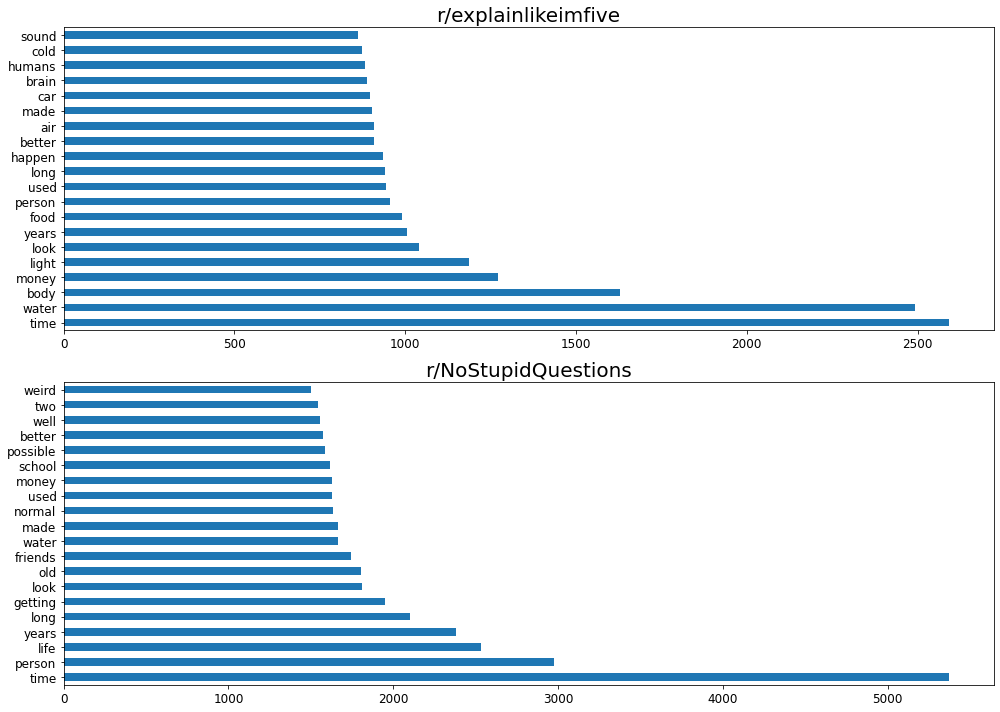

In [55]:
plt.figure(figsize=(14,10))

plt.subplot(211)
plt.title('r/explainlikeimfive',size=20)
df_explain_text.head(20).plot(kind='barh',fontsize=12)

plt.subplot(212)
plt.title('r/NoStupidQuestions',size=20)
df_stupid_text.head(20).plot(kind='barh',fontsize=12)

plt.tight_layout()
#plt.savefig('./imgs/word_freq_1.png');

r/explainlikeimfive seems to have more objective words like: "car," "sound," "brain," and "human." On the other hand r/NoStupidQuestions seems to have more subjective words like: "weird" and "normal." Also it's inclusion of "school" makes me think that perhaps a younger audience uses it for more personal questions that the more scientific sounding words of the first subreddit. interestingly, they both have "time" as their most used word.

In [37]:
just_text[just_text['text'].str.contains("time")]

,text,subreddit,length,word_count
21,why particle entanglement can't be used as a ...,explainlikeimfive,389,69
92,How are discs and external hard drives differ...,explainlikeimfive,306,60
97,Why do small amounts of water sometimes explo...,explainlikeimfive,76,12
103,"Why can we execute prisoners, or out them in ...",explainlikeimfive,931,162
108,How does time dilation work? [removed],explainlikeimfive,39,6
...,...,...,...,...
95104,Why is oversharing a red flag? I overshare all...,NoStupidQuestions,62,12
95105,Who am I? A question I first asked myself 4 ye...,NoStupidQuestions,1017,191
95106,Why strawberry is such a common flavor? From d...,NoStupidQuestions,392,67
95110,Am I weird for being this way all my life? Sin...,NoStupidQuestions,1483,275


In [38]:
quote = just_text.at[95104,'text']

In [39]:
quote

'Why is oversharing a red flag? I overshare all the time. Oops.'

In [40]:
quote2 = just_text.at[108,'text']

In [41]:
quote2

' How does time dilation work? [removed]'

Both subreddits use the word "time" but clearly they use it in different contexts. One is a physics, quantum question while the other is a personal issue, potentially a joke.

In [56]:
sent = SentimentIntensityAnalyzer()

In [57]:
def sentiment_column(data):
    """This functions purpose is to take in your cleaned dataframe and add
    sentiment analysis scores as columns to it"""
    scores = []
    neg = []
    neu= []
    pos = []
    comp = []
    for i in range(0,len(data['text'])):
        scores.append(sent.polarity_scores(data['text'][i]))
        neg.append(scores[i]['neg'])
        neu.append(scores[i]['neu'])
        pos.append(scores[i]['pos'])
        comp.append(scores[i]['compound'])
    data['neg'] = neg
    data['neu'] = neu
    data['pos'] = pos
    data['comp'] = comp
    return data

Let's take a look at the sentiment scores of the subreddits.

In [58]:
sentiment_column(just_text)

,text,subreddit,length,word_count,neg,neu,pos,comp
0,What is Twitter?,explainlikeimfive,18,3,0.000,1.000,0.000,0.0000
1,Why Does the Bail System Exist as it is? I’ve...,explainlikeimfive,759,139,0.153,0.746,0.100,-0.8278
2,if countless animals have existed before huma...,explainlikeimfive,129,22,0.000,1.000,0.000,0.0000
3,What is Radiation Stress and how does it rela...,explainlikeimfive,59,11,0.219,0.781,0.000,-0.4215
4,How can stuff be so cheap online? How can I p...,explainlikeimfive,536,101,0.061,0.831,0.108,0.6848
...,...,...,...,...,...,...,...,...
95136,"People who hate golf, why do you hate golf? an...",NoStupidQuestions,100,21,0.260,0.569,0.171,-0.5661
95137,"Have any of you ever eaten cow manure? If so, ...",NoStupidQuestions,71,15,0.000,0.830,0.170,0.4329
95138,How can I unlearn being so apathetic about eve...,NoStupidQuestions,64,10,0.264,0.736,0.000,-0.4341
95139,Can have a Parrot to unlearn a word? Friend ca...,NoStupidQuestions,219,42,0.063,0.805,0.132,0.4767


In [59]:
#just_text.to_csv('./data/text_base.csv',index=False)

In [60]:
just_text.loc[just_text['comp']!=0]

,text,subreddit,length,word_count,neg,neu,pos,comp
1,Why Does the Bail System Exist as it is? I’ve...,explainlikeimfive,759,139,0.153,0.746,0.100,-0.8278
3,What is Radiation Stress and how does it rela...,explainlikeimfive,59,11,0.219,0.781,0.000,-0.4215
4,How can stuff be so cheap online? How can I p...,explainlikeimfive,536,101,0.061,0.831,0.108,0.6848
6,": What is the ""Deep State"" and why do people ...",explainlikeimfive,410,77,0.073,0.902,0.025,-0.5439
8,What is the purpose of doing business if comp...,explainlikeimfive,623,99,0.029,0.717,0.254,0.9760
...,...,...,...,...,...,...,...,...
95136,"People who hate golf, why do you hate golf? an...",NoStupidQuestions,100,21,0.260,0.569,0.171,-0.5661
95137,"Have any of you ever eaten cow manure? If so, ...",NoStupidQuestions,71,15,0.000,0.830,0.170,0.4329
95138,How can I unlearn being so apathetic about eve...,NoStupidQuestions,64,10,0.264,0.736,0.000,-0.4341
95139,Can have a Parrot to unlearn a word? Friend ca...,NoStupidQuestions,219,42,0.063,0.805,0.132,0.4767


In [61]:
just_text['comp'].loc[just_text['subreddit']=='NoStupidQuestions'].mean()

0.06075442364861967

In [62]:
just_text['comp'].loc[just_text['subreddit']=='explainlikeimfive'].mean()

0.044712707124010605

In [63]:
just_text.describe()

,length,word_count,neg,neu,pos,comp
count,95141.000000,95141.000000,95141.000000,95141.000000,95141.000000,95141.000000
mean,217.284767,39.657582,0.067445,0.855409,0.077123,0.052767
std,265.828583,49.521506,0.101125,0.133325,0.097810,0.485534
min,3.000000,1.000000,0.000000,0.000000,0.000000,-0.999500
25%,71.000000,12.000000,0.000000,0.771000,0.000000,-0.264000
50%,127.000000,23.000000,0.000000,0.867000,0.043000,0.000000
75%,267.000000,49.000000,0.110000,1.000000,0.130000,0.421500
max,13275.000000,2659.000000,1.000000,1.000000,1.000000,0.999100


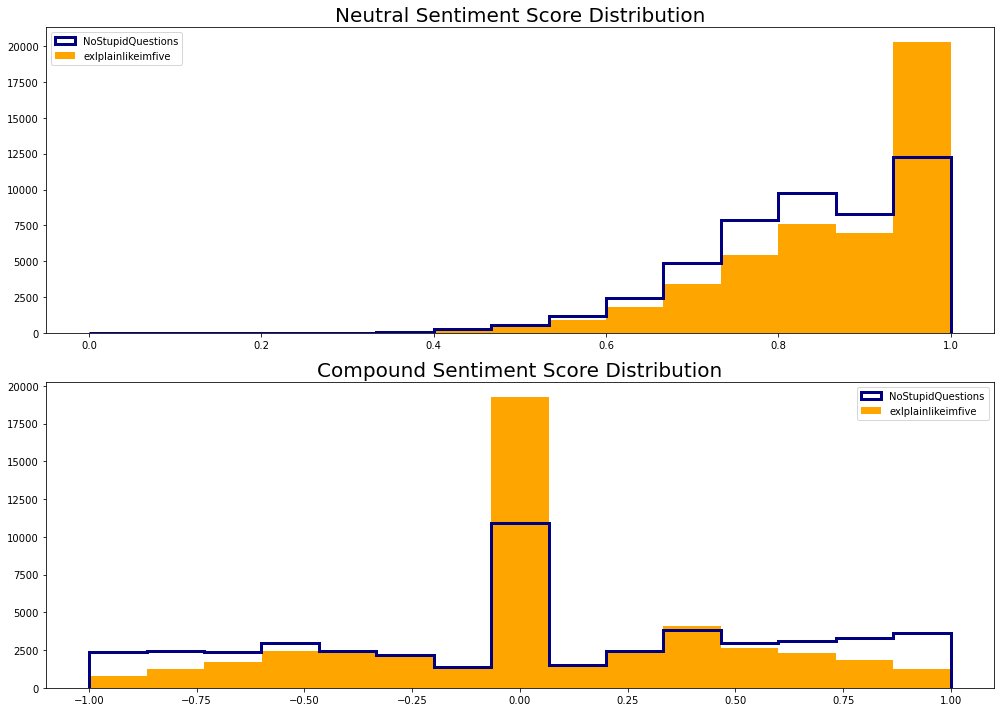

In [64]:
plt.figure(figsize=(14,10))

plt.subplot(211)
plt.title('Neutral Sentiment Score Distribution',size=20)
plt.hist(x=just_text[just_text['subreddit']=='NoStupidQuestions']['neu'],bins=15,color='navy',histtype='step',linewidth=3,label='NoStupidQuestions',);
plt.hist(x=just_text[just_text['subreddit']=='explainlikeimfive']['neu'],bins=15,histtype='bar',color='orange',label='exlplainlikeimfive',);
plt.legend();
plt.subplot(212)
plt.title('Compound Sentiment Score Distribution',size=20)
plt.hist(x=just_text[just_text['subreddit']=='NoStupidQuestions']['comp'],bins=15,color='navy',histtype='step',linewidth=3,label='NoStupidQuestions',);
plt.hist(x=just_text[just_text['subreddit']=='explainlikeimfive']['comp'],bins=15,histtype='bar',color='orange',label='exlplainlikeimfive',);
plt.legend();

plt.tight_layout()
#plt.savefig('./imgs/neutrality_dist.png');

Since in this project we are focusing on the difference between these two information subreddits, I care less about positivity and negativity and more about how they are different and what types of questions they answer. As such we are going to look at neutrality and compound scores as seen above.

Very clearly we can see that explainlikeimfive is far more neutral and has less tendency to spike at the extremes of positive and negative while NoStupidQuestions shows the opposite, a tendency to spike closer to 1 and -1 with a lower neutrality score. This confirms, to some extent, what we were noticing in word counts with time and length in that although both of these forums are billed as informational, they act in two differnt ways which could lead to confusion and misinforming a potential new poster.